In [356]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import heapq

In [545]:
D = pd.read_csv('iris.csv', ';', nrows=6)
label = 'variety'
D[label] = D[label].astype('category')
S = rbf_kernel(D.drop(label, axis=1), gamma=1)
D

,variety,sepal_length,sepal_width,petal_length,petal_width
0,Setosa,5.1,3.5,1.4,0.2
1,Setosa,4.9,3.0,1.4,0.2
2,Setosa,4.7,3.2,1.3,0.2
3,Setosa,4.6,3.1,1.5,0.2
4,Setosa,5.0,3.6,1.4,0.2
5,Setosa,5.4,3.9,1.7,0.4


In [221]:
D2 = D[:5]
S2 = rbf_kernel(D2.drop(label, axis=1), gamma=1)

In [127]:
def get_neighbors(S, o):
    for index, similarity in enumerate(S[o]):
        if index == o:
            continue
        yield index, similarity

In [128]:
# Definition 1
def local_degree(S, o, threshold=0.0):
    """Local degree d(O_i)"""
    degree = 0
    for index, item in get_neighbors(S, o):
        if item > threshold:
            degree += 1
    return degree

In [129]:
for o in range(len(D)):
    ld = local_degree(S, o)
    assert ld == 149
    print(o, ld)

0 149
1 149
2 149
3 149
4 149
5 149
6 149
7 149
8 149
9 149
10 149
11 149
12 149
13 149
14 149
15 149
16 149
17 149
18 149
19 149
20 149
21 149
22 149
23 149
24 149
25 149
26 149
27 149
28 149
29 149
30 149
31 149
32 149
33 149
34 149
35 149
36 149
37 149
38 149
39 149
40 149
41 149
42 149
43 149
44 149
45 149
46 149
47 149
48 149
49 149
50 149
51 149
52 149
53 149
54 149
55 149
56 149
57 149
58 149
59 149
60 149
61 149
62 149
63 149
64 149
65 149
66 149
67 149
68 149
69 149
70 149
71 149
72 149
73 149
74 149
75 149
76 149
77 149
78 149
79 149
80 149
81 149
82 149
83 149
84 149
85 149
86 149
87 149
88 149
89 149
90 149
91 149
92 149
93 149
94 149
95 149
96 149
97 149
98 149
99 149
100 149
101 149
102 149
103 149
104 149
105 149
106 149
107 149
108 149
109 149
110 149
111 149
112 149
113 149
114 149
115 149
116 149
117 149
118 149
119 149
120 149
121 149
122 149
123 149
124 149
125 149
126 149
127 149
128 149
129 149
130 149
131 149
132 149
133 149
134 149
135 149
136 149
137 149
138 14

In [555]:
pd.DataFrame(S)

,0,1,2,3,4,5
0,1.000000,0.748264,0.771052,0.657047,0.980199,0.683861
1,0.748264,1.000000,0.913931,0.895834,0.690734,0.304221
2,0.771052,0.913931,1.000000,0.941765,0.771052,0.307279
3,0.657047,0.895834,0.941765,1.000000,0.657047,0.256661
4,0.980199,0.690734,0.771052,0.657047,1.000000,0.683861
5,0.683861,0.304221,0.307279,0.256661,0.683861,1.000000


In [559]:
# Definition 2
def local_significance(S, o):
    """Local significance g(O_i)"""
    # TODO: it can be calculated once for all in O(n^2) = store the results!
    significance = 0
    for i in range(len(S[o])):
        if i == o:
            continue
        
        # TODO: take all maximal values, not only one
        max_index, max_value = max(get_neighbors(S, i), key=lambda x: x[1])
        #print("max index", max_index, "max value", max_value)
        
        if o == max_index:
            significance += 1
            continue
        else:
            for index, similarity in get_neighbors(S, i):
                if max_index == index:
                    continue
#                 if math.isclose(similarity, max_value, rel_tol=1e-9):
                if similarity == max_value:
                    significance += 1
                    #print(max_index, max_value, similarity)
                    break
        #print(o, i, index)
    return significance

In [563]:
list(get_neighbors(S, 5))

[(0, 0.683861409212354),
 (1, 0.30422126406670474),
 (2, 0.30727873860112914),
 (3, 0.2566607769535542),
 (4, 0.683861409212354)]

In [560]:
local_significance(S, 4)

1

In [556]:
lc_total = 0
for o in range(len(D)):
    lc = local_significance(S, o)
    lc_total += lc
    print(o, lc)
#assert lc_total == len(D)
# u o=4 ma byt 2 a ne 1

0 2
1 1
2 3
3 2
4 2
5 0


In [132]:
# Definition 3
def representativeness(S, o, x):
    """x-representativeness r_x(O_i)"""
    assert x > 0
    assert local_degree(S, o)
    
    return local_significance(S, o) / math.log(1 + local_degree(S, o), x)

In [133]:
for o in range(len(D)):
    print(o, representativeness(S, o, 2))

0 0.4150055670844619
1 0.2766703780563079
2 0.0
3 0.13833518902815395
4 0.13833518902815395
5 0.13833518902815395
6 0.13833518902815395
7 0.4150055670844619
8 0.2766703780563079
9 0.13833518902815395
10 0.4150055670844619
11 0.13833518902815395
12 0.13833518902815395
13 0.0
14 0.0
15 0.0
16 0.0
17 0.2766703780563079
18 0.13833518902815395
19 0.2766703780563079
20 0.13833518902815395
21 0.13833518902815395
22 0.0
23 0.13833518902815395
24 0.0
25 0.0
26 0.2766703780563079
27 0.0
28 0.13833518902815395
29 0.0
30 0.13833518902815395
31 0.13833518902815395
32 0.13833518902815395
33 0.4150055670844619
34 0.4150055670844619
35 0.0
36 0.0
37 0.0
38 0.4150055670844619
39 0.13833518902815395
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.13833518902815395
47 0.4150055670844619
48 0.13833518902815395
49 0.13833518902815395
50 0.13833518902815395
51 0.13833518902815395
52 0.4150055670844619
53 0.13833518902815395
54 0.13833518902815395
55 0.0
56 0.2766703780563079
57 0.2766703780563079
58 0.276670

In [134]:
# Definition 4
def representativeness_base(S, o):
    """x-representativeness base b(O_i)"""
    return (1 + local_degree(S, o)) ** (1 / local_significance(S, o))

In [136]:
# Definition 5
def local_representativeness(S, o):
    """local representativeness lr(O_i)"""
    return 1 / representativeness_base(S, o) if local_significance(S, o) > 0 else 0

In [137]:
for o in range(len(D)):
    print(o, local_representativeness(S, o))

0 0.18820720577620573
1 0.08164965809277261
2 0
3 0.006666666666666667
4 0.006666666666666667
5 0.006666666666666667
6 0.006666666666666667
7 0.18820720577620573
8 0.08164965809277261
9 0.006666666666666667
10 0.18820720577620573
11 0.006666666666666667
12 0.006666666666666667
13 0
14 0
15 0
16 0
17 0.08164965809277261
18 0.006666666666666667
19 0.08164965809277261
20 0.006666666666666667
21 0.006666666666666667
22 0
23 0.006666666666666667
24 0
25 0
26 0.08164965809277261
27 0
28 0.006666666666666667
29 0
30 0.006666666666666667
31 0.006666666666666667
32 0.006666666666666667
33 0.18820720577620573
34 0.18820720577620573
35 0
36 0
37 0
38 0.18820720577620573
39 0.006666666666666667
40 0
41 0
42 0
43 0
44 0
45 0
46 0.006666666666666667
47 0.18820720577620573
48 0.006666666666666667
49 0.006666666666666667
50 0.006666666666666667
51 0.006666666666666667
52 0.18820720577620573
53 0.006666666666666667
54 0.006666666666666667
55 0
56 0.08164965809277261
57 0.08164965809277261
58 0.08164965

In [ ]:
# Definition 6
def representative_neighbor(S, o):
    """representative neighbor K(O_i)"""
    min_neighbors = 1 # parameter
    k = max(round(local_representativeness(S, o) * local_degree(S, o)), min_neighbors)
    
    key_lambda = lambda x: x[1]
    tmp = list(heapq.nlargest(k*2, get_neighbors(S, o), key_lambda))
    
    for i in range(k + 1, k*2):
        if math.isclose(tmp[k][1], tmp[i][1], rel_tol=1e-5):
            k += 1
    return tmp[:k]
    #return heapq.nlargest(k, get_neighbors(S, o), key_lambda)

In [447]:
for o in range(len(S)):
    print(o, representative_neighbor(S, o))

0 [(4, 0.9801986733067592), (7, 0.970445533548507), (9, 0.8025187979624794), (2, 0.7710515858035678), (6, 0.7633794943368563), (1, 0.7482635675785552), (5, 0.683861409212354)]
1 [(9, 0.9704455335485139)]
2 [(3, 0.9417645335842533), (6, 0.9323938199059479), (1, 0.9139311852712251), (9, 0.9048374180359712), (7, 0.8436648165963883)]
3 [(2, 0.9417645335842533), (8, 0.9139311852712251), (9, 0.9048374180359647), (6, 0.8958341352965288), (1, 0.8958341352965224)]
4 [(0, 0.9801986733067592)]
5 [(0, 0.683861409212354)]
6 [(2, 0.9323938199059479)]
7 [(0, 0.970445533548507)]
8 [(3, 0.9139311852712251)]
9 [(1, 0.9704455335485139)]


In [552]:
data = []
columns = ['Object', 'Local degree', 'Local significance', 'x-representativeness', 'local representativeness', 'representative neighbor']

x = 10
for o in range(len(S)):
    data.append([
        o,
        local_degree(S, o),
        local_significance(S, o),
        representativeness(S, o, x),
        local_representativeness(S, o),
        len(representative_neighbor(S, o))
    ])

df = pd.DataFrame(data=data, columns=columns)

IndexError: list index out of range

In [547]:
df

,Object,Local degree,Local significance,x-representativeness,local representativeness,representative neighbor
0,0,5,2,2.570194,0.408248,3
1,1,5,0,0.000000,0.000000,1
2,2,5,2,2.570194,0.408248,3
3,3,5,1,1.285097,0.166667,1
4,4,5,1,1.285097,0.166667,1
5,5,5,0,0.000000,0.000000,1


In [437]:
def LRNet(D):
    S = rbf_kernel(D.drop(label, axis=1), gamma=1)
    G = nx.Graph()
    for i, o in D.iterrows():
        G.add_node(i, label=o.variety) #o=o) # TODO: mapping of object -> node that is passed to the add_node
    
    for i, o in D.iterrows():
        for j, s in representative_neighbor(S, i):
            G.add_edge(i, j, s=s)
            
    #G.remove_nodes_from(list(nx.isolates(G)))
    
    return G

In [438]:
G = LRNet(D)

In [446]:
len(G.edges())

17

In [440]:
def plot_graph(G, labels):
    nx.draw_networkx(G, with_labels=False, node_color=labels, cmap=plt.cm.Set1, node_size=20)

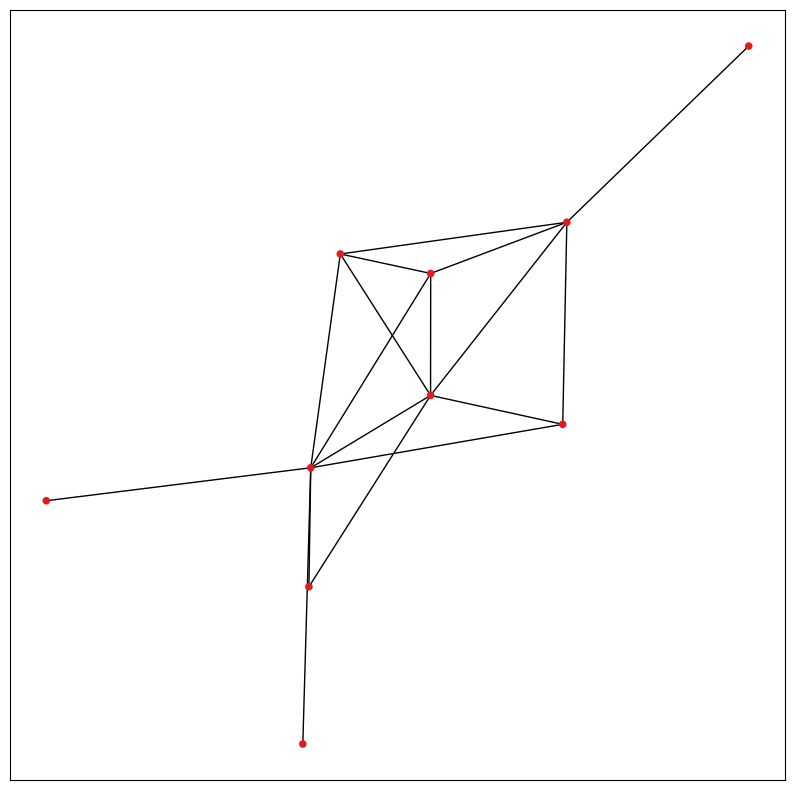

In [441]:
plt.figure(figsize=(10, 10))
plot_graph(G, D[label].cat.codes)
# TODO: plot label legend from D[label].values.categories
plt.show()

In [442]:
nx.write_gexf(G, "test.gexf")